In [1]:
import pygrib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
grbs = pygrib.open('../data/weather/august_full/rap_130_20180808_1500_000.grb2')

In [3]:
#grbs.seek(0)
grb = grbs.select(name='Visibility')[0]
lats, lons = grb.latlons()
data = grb['values']
#plt.scatter(lons,lats,1,data)

In [5]:
np.max(lons)-np.min(lons)

82.47505179127432

In [10]:
ranges = [(0,10),(0,90000),(-10,50),(0,100)]

In [11]:
ranges[2][0]

-10

In [29]:
testdict = {'test1':'label1','test2':'label2'}
for key in testdict:
    print(testdict[key])

label1
label2


In [27]:
tmpmsgs = grbs.select(name='Temperature',typeOfLevel='isobaricInhPa')
print(tmpmsgs)

[9:Temperature:K (instant):lambert:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201801010000, 15:Temperature:K (instant):lambert:isobaricInhPa:level 12500 Pa:fcst time 0 hrs:from 201801010000, 21:Temperature:K (instant):lambert:isobaricInhPa:level 15000 Pa:fcst time 0 hrs:from 201801010000, 27:Temperature:K (instant):lambert:isobaricInhPa:level 17500 Pa:fcst time 0 hrs:from 201801010000, 33:Temperature:K (instant):lambert:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201801010000, 39:Temperature:K (instant):lambert:isobaricInhPa:level 22500 Pa:fcst time 0 hrs:from 201801010000, 45:Temperature:K (instant):lambert:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 201801010000, 51:Temperature:K (instant):lambert:isobaricInhPa:level 27500 Pa:fcst time 0 hrs:from 201801010000, 57:Temperature:K (instant):lambert:isobaricInhPa:level 30000 Pa:fcst time 0 hrs:from 201801010000, 63:Temperature:K (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201801010000, 69:Tempera

In [3]:
for grb in grbs:
    print(grb)

1:Maximum/Composite radar reflectivity:dB (instant):lambert:atmosphere:level 0 -:fcst time 0 hrs:from 201808081100
2:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201808081100
3:Derived radar reflectivity:dB (instant):lambert:heightAboveGround:level 1000 m:fcst time 0 hrs:from 201808081100
4:Derived radar reflectivity:dB (instant):lambert:heightAboveGround:level 4000 m:fcst time 0 hrs:from 201808081100
5:Geopotential Height:gpm (instant):lambert:unknown:level 0:fcst time 0 hrs:from 201808081100
6:Wind speed (gust):m s**-1 (instant):lambert:surface:level 0:fcst time 0 hrs:from 201808081100
7:3:3 (instant):lambert:unknown:level 0 considered as a single layer:fcst time 0 hrs:from 201808081100
8:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201808081100
9:Temperature:K (instant):lambert:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201808081100
10:Relative humidity:% (instant):lambert:isobaricInhPa:level 10000 Pa:fcst 

In [30]:
tmpmsgs.level

AttributeError: 'list' object has no attribute 'level'

In [7]:
grb = grbs.select(name='Total Cloud Cover')[0]
grb = grbs.select(name='Total Cloud Cover')[0]

In [105]:
maxv.shape

(337, 451)

In [101]:
100*100*3*4

120000

In [68]:
grb = grbs.message(2)

In [69]:
grb

2:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201801010000

In [44]:
import basemap

ModuleNotFoundError: No module named 'basemap'

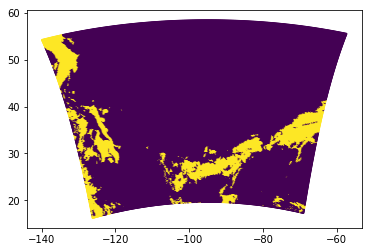

In [4]:
grb = grbs.select(name='Categorical rain')[0]
lats, lons = grb.latlons()
data = grb['values']
plt.scatter(lons,lats,1,data)

In [7]:
data.min()

0.0

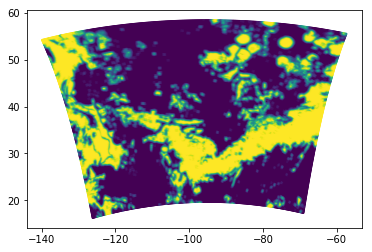

In [11]:
plt.scatter(lons,lats,1,data)

In [13]:
data.shape

(337, 451)

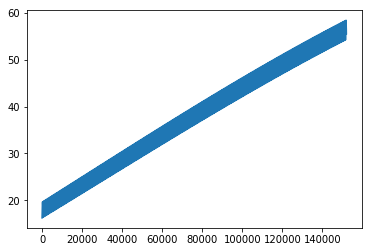

In [15]:
plt.plot(lats.reshape(-1,1))

In [31]:
def grb_to_grid(grb_obj):
    """Takes a single grb object containing multiple
    levels. Assumes same time, pressure levels. Compiles to a cube"""
    n_levels = len(grb_obj)
    levels = np.array([grb_element['level'] for grb_element in grb_obj])
    indexes = np.argsort(levels)[::-1] # highest pressure first
    cube = np.zeros([n_levels, grb_obj[0].values.shape[0], grb_obj[1].values.shape[1]])
    for i in range(n_levels):
        cube[i,:,:] = grb_obj[indexes[i]].values
    cube_dict = {'data' : cube, 'units' : grb_obj[0]['units'],
                 'levels' : levels[indexes]}
    return cube_dict

In [78]:
grb = grbs.select(name='Categorical rain')[0]

In [76]:
grb_cape = grb_to_grid(grb)

IndexError: list index out of range

In [66]:
grb_cape

{'data': array([[[2210., 2180., 2140., ...,  770.,  770.,  800.],
         [2170., 2130., 2080., ...,  710.,  660.,  660.],
         [2130., 2110., 2100., ...,  760.,  640.,  580.],
         ...,
         [   0.,    0.,    0., ...,  250.,  250.,  240.],
         [   0.,    0.,    0., ...,  270.,  270.,  270.],
         [   0.,    0.,    0., ...,  270.,  280.,  280.]],
 
        [[2070., 2040., 1990., ...,  560.,  570.,  600.],
         [2010., 1970., 1930., ...,  520.,  470.,  470.],
         [1960., 1930., 1930., ...,  580.,  470.,  410.],
         ...,
         [  20.,   10.,   20., ...,  240.,  240.,  230.],
         [  10.,   10.,   20., ...,  260.,  260.,  250.],
         [  10.,   10.,   10., ...,  250.,  270.,  270.]],
 
        [[1230., 1240., 1220., ...,    0.,    0.,    0.],
         [1190., 1200., 1200., ...,   10.,    0.,    0.],
         [1130., 1140., 1170., ...,  100.,   10.,    0.],
         ...,
         [   0.,    0.,    0., ...,  170.,  170.,  160.],
         [   0.,

In [79]:
grb['values']

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [67]:
grb=grbs

AttributeError: 'list' object has no attribute 'keys'